## 1. Import all necessary libraries

In [7]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

## 1a. Importing dataset by specifying data path

In [8]:
vehicles=pd.read_csv('/Users/alvina/Desktop/vehicles.csv')

#### Importing raw dataset for a pre-prediction analysis

In [9]:



vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


#### Let's take a look at the number of attributes, it's types and the number of observations before moving in to deep analysis.

In [10]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
description     509561 non-null object
county          0 non-null float64
state           509577 non-null obj

#### We can see that there are:
    - 509577 observations
    - 25 attributes
    - 5 float-types, 2 integer-types, 18 0bject-types(List,dictionaries,tuples,strings)

In [11]:
##raw_profile = vehicles.profile_report(style={'full_width':True})

In [12]:
vehicles.nunique()

id              509577
url             509577
region             403
region_url         413
price            17854
year               114
manufacturer        43
model            35852
condition            6
cylinders            8
fuel                 5
odometer        119873
title_status         6
transmission         3
vin             180145
drive                3
size                 4
type                13
paint_color         12
image_url       349468
description     427803
county               0
state               51
lat              51488
long             51467
dtype: int64

##raw_profile

In [13]:
vehicles=vehicles.drop(columns=['url','id','image_url', 'lat', 'long', 'region_url', 'description', 'region', 'vin' , 'county','state'], axis=1)

In [14]:
list(vehicles)


['price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [15]:
null_values=vehicles.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])

sum_tot=len(vehicles)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,34200300,67.115
condition,23193400,45.515
cylinders,19968300,39.186
paint_color,16470600,32.322
drive,14414300,28.287
type,14153100,27.774
odometer,9232400,18.118
manufacturer,2276400,4.467
model,798900,1.568
fuel,398500,0.782


#### Let's eliminate the outlier values of price


In [16]:
vehicles[vehicles.price == 0].shape

(43579, 14)

In [17]:
vehicles[vehicles.price < 750].shape

(54695, 14)

In [18]:
vehicles=vehicles[(vehicles.price < 100000) & (vehicles.price >= 750 )]
vehicles.shape

(454397, 14)

### So we are only considering the price of the vehicles greater than or equal to 750 and less than 10,000 .Also, Odometers higher than 300k and lower than 10, and models earlier than 1985 may not be good observations for a good prediction. 

In [19]:
vehicles[vehicles.odometer < 1000].shape

(7300, 14)

In [20]:

vehicles[vehicles.odometer < 1000].sample(20)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
207814,3500,2001.0,bmw,330i,good,6 cylinders,gas,150.0,clean,automatic,rwd,NaN,NaN,black
67974,5000,2003.0,cadillac,deville,excellent,8 cylinders,gas,106.0,clean,automatic,NaN,NaN,sedan,black
136719,4000,2002.0,lexus,es 300,excellent,6 cylinders,gas,1.0,clean,automatic,rwd,NaN,sedan,NaN
187834,2450,2000.0,acura,tl,NaN,NaN,gas,180.0,clean,automatic,NaN,NaN,sedan,green
493036,4995,1981.0,chevrolet,corvette,NaN,NaN,gas,1.0,clean,automatic,rwd,NaN,NaN,NaN
479182,41888,2016.0,gmc,2500,NaN,NaN,diesel,106.0,clean,automatic,NaN,NaN,NaN,NaN
20143,13995,2011.0,acura,zdx,NaN,NaN,gas,1.0,clean,NaN,NaN,NaN,SUV,black
256091,9000,1998.0,chevrolet,corvette convertible,good,8 cylinders,gas,140.0,clean,automatic,rwd,compact,coupe,red
471659,5000,2009.0,honda,civic hybrid,excellent,4 cylinders,hybrid,183.0,clean,automatic,NaN,compact,sedan,silver
191068,8900,2012.0,nissan,titan sl,NaN,8 cylinders,gas,230.0,clean,automatic,rwd,NaN,NaN,NaN


In [21]:
vehicles[vehicles.odometer >300000].shape

(2607, 14)

In [22]:
vehicles=vehicles[(vehicles.odometer < 300000) & (vehicles.odometer > 1000)]
vehicles=vehicles[vehicles.year>1985]
vehicles.shape

(361516, 14)

In [23]:
null_values=vehicles.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(vehicles)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23332400,64.540
condition,14846100,41.066
cylinders,12293600,34.006
paint_color,8853800,24.491
drive,7359100,20.356
type,6892400,19.065
manufacturer,1013100,2.802
model,336000,0.929
transmission,303100,0.838
fuel,297100,0.822


#### As we look in to this table there are more missing values for other attributes. So it is necessary to fill those in a more meaningful way.

## 2. Dealing with Missing Values

### 2a. Dealing with missing 'condition ' values.

In [24]:
vehicles['condition'].isnull().sum()

148461

#### There are 148461 missing values in vondition attributes.

In [25]:
vehicles.loc[(vehicles['year'] >= 2017)]['condition'].isnull().sum()

27595

In [26]:
vehicles.condition.value_counts()

excellent    108434
good          77727
like new      20521
fair           5533
new             518
salvage         322
Name: condition, dtype: int64

#### Let's assume and name cars after the year '2019' as 'new' and after '2017-2020' as 'like new'

In [27]:
vehicles.loc[vehicles.year>=2019, 'condition'] = vehicles.loc[vehicles.year>=2019, 'condition'].fillna('new')
vehicles.loc[vehicles.year>=2017, 'condition'] = vehicles.loc[vehicles.year>=2017, 'condition'].fillna('like new')

In [28]:
vehicles.condition.value_counts()

excellent    108434
good          77727
like new      43786
fair           5533
new            4848
salvage         322
Name: condition, dtype: int64

#### The mileage of car also affects its condition. So, lets fill missing value depending on odometer.

In [29]:
excellent_odo_mean = vehicles[vehicles['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = vehicles[vehicles['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = vehicles[vehicles['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = vehicles[vehicles['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = vehicles[vehicles['condition'] == 'fair']['odometer'].mean()

In [30]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 58359.18
Excellent average odometer: 106468.08
Good average odometer: 117298.76
Fair average odometer: 173401.01
Salvage average odometer: 139977.1


In [31]:
vehicles.loc[vehicles['odometer'] <= like_new_odo_mean, 'condition'].value_counts()

like new     28019
excellent    21199
good         16807
new           4563
fair            95
salvage         36
Name: condition, dtype: int64

In [32]:
vehicles.loc[vehicles['odometer'] <= like_new_odo_mean, 'condition'] = vehicles.loc[vehicles['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

vehicles.loc[vehicles['odometer'] >= fair_odo_mean, 'condition'] = vehicles.loc[vehicles['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

vehicles.loc[((vehicles['odometer'] > like_new_odo_mean) & 
       (vehicles['odometer'] <= excellent_odo_mean)), 'condition'] = vehicles.loc[((vehicles['odometer'] > like_new_odo_mean) & 
       (vehicles['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

vehicles.loc[((vehicles['odometer'] > excellent_odo_mean) & 
       (vehicles['odometer'] <= good_odo_mean)), 'condition'] = vehicles.loc[((vehicles['odometer'] > excellent_odo_mean) & 
       (vehicles['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

vehicles.loc[((vehicles['odometer'] > good_odo_mean) & 
       (vehicles['odometer'] <= fair_odo_mean)), 'condition'] = vehicles.loc[((vehicles['odometer'] > good_odo_mean) & 
       (vehicles['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [33]:
null_values=vehicles.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])

sum_tot=len(vehicles)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23332400,64.540
cylinders,12293600,34.006
paint_color,8853800,24.491
drive,7359100,20.356
type,6892400,19.065
manufacturer,1013100,2.802
model,336000,0.929
transmission,303100,0.838
fuel,297100,0.822
title_status,241700,0.669


#### 2.b Dealing with missing 'cylinder' values

In [34]:

vehicles.cylinders.value_counts()

6 cylinders     87364
4 cylinders     74964
8 cylinders     71261
5 cylinders      2223
10 cylinders     1437
other             794
3 cylinders       400
12 cylinders      137
Name: cylinders, dtype: int64

#### With time series data, using pad/ffill is extremely common so that the “last known value” is available at every time point. In other words, ffill propagates last valid observation forward to next valid. Therefore, rest of the missing values will be filled with 'ffill' method.

In [35]:
vehicles['transmission'] = vehicles['transmission'].fillna(method='ffill')
vehicles['cylinders'] = vehicles['cylinders'].fillna(method='ffill')
vehicles['title_status'] = vehicles['title_status'].fillna(method='ffill')
vehicles['fuel'] = vehicles['fuel'].fillna(method='ffill')
vehicles['size'] = vehicles['size'].fillna(method='ffill')
vehicles['paint_color'] = vehicles['paint_color'].fillna(method='ffill')
vehicles['drive'] = vehicles['drive'].fillna(method='ffill')
vehicles['manufacturer'] = vehicles['manufacturer'].fillna(method='ffill')
vehicles['model'] = vehicles['model'].fillna(method='ffill')
vehicles['type'] = vehicles['type'].fillna(method='ffill')

In [36]:

vehicles.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

In [37]:
null_values= vehicles.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])

sum_tot=len(vehicles)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0
transmission,0,0.0


### All the missing values are manipulated.

In [38]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361516 entries, 0 to 509576
Data columns (total 14 columns):
price           361516 non-null int64
year            361516 non-null float64
manufacturer    361516 non-null object
model           361516 non-null object
condition       361516 non-null object
cylinders       361516 non-null object
fuel            361516 non-null object
odometer        361516 non-null float64
title_status    361516 non-null object
transmission    361516 non-null object
drive           361516 non-null object
size            361516 non-null object
type            361516 non-null object
paint_color     361516 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 41.4+ MB


In [39]:
vehicles.shape

(361516, 14)

#### There are 361516 observations with 14 attributes in to consideration.

In [40]:
vehicles.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,black
2,46463,2015.0,gmc,sierra 1500,excellent,4 cylinders,gas,7554.0,clean,automatic,4wd,compact,hatchback,white
4,49999,2018.0,ford,f-450,like new,4 cylinders,diesel,70150.0,clean,automatic,4wd,compact,pickup,white
5,13999,2009.0,ram,f-450,salvage,4 cylinders,gas,120057.0,clean,automatic,4wd,compact,pickup,silver
6,34500,2017.0,ford,f-350,like new,4 cylinders,diesel,95484.0,clean,automatic,4wd,compact,pickup,white


### 4. Visualisation

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

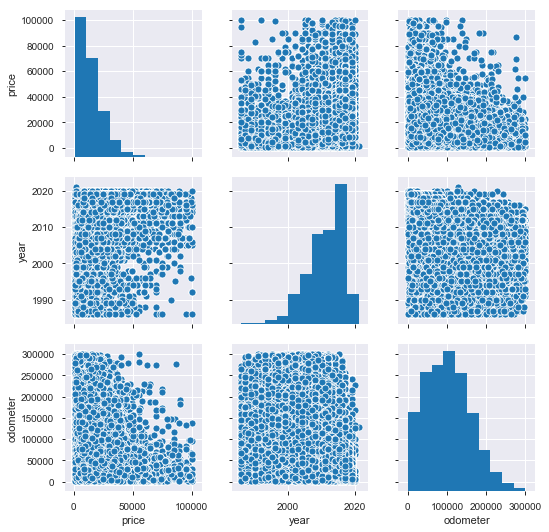

In [42]:
sns.pairplot(vehicles)

In [43]:
vehicles.sort_values('year').sample(10)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
141900,3295,1996.0,nissan,pathfinder,fair,8 cylinders,gas,193343.0,clean,manual,4wd,full-size,pickup,red
462185,3000,2009.0,volkswagen,routan sel,excellent,6 cylinders,gas,181000.0,clean,automatic,fwd,full-size,SUV,silver
224512,26990,2006.0,gmc,c7e042,good,6 cylinders,diesel,58106.0,clean,automatic,rwd,full-size,truck,white
318003,11900,2009.0,lexus,rx350,excellent,6 cylinders,gas,142000.0,clean,automatic,4wd,full-size,truck,green
80438,11900,2015.0,nissan,altima sv 2.5 4dr sedan,like new,4 cylinders,gas,68000.0,clean,automatic,4wd,full-size,sedan,blue
193325,5250,1996.0,ford,super wagon,excellent,8 cylinders,gas,190000.0,clean,automatic,rwd,full-size,van,black
221529,10898,2007.0,toyota,tacoma,excellent,4 cylinders,gas,105060.0,clean,automatic,rwd,mid-size,pickup,custom
253038,8995,2011.0,chevrolet,equinox,excellent,4 cylinders,gas,69063.0,clean,automatic,fwd,full-size,SUV,black
19337,14999,2015.0,volkswagen,passat,like new,4 cylinders,diesel,21684.0,clean,automatic,fwd,compact,sedan,black
48533,22550,2012.0,ram,1500,like new,8 cylinders,gas,50375.0,clean,automatic,4wd,full-size,truck,black


#### -price v/s  (yrs)-mileage for diff manufacturer
     -manufacturer based distribution
     -distribution of types of car

In [44]:
vehicles.to_csv('cars_cleaned.csv', index=False)